<a href="https://colab.research.google.com/github/Oks11111/TP_entrega_vpc2/blob/main/vpc2_Tp_Final_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fuentes

####  - tutorial yolov5: https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynbscrollTo=1NcFxRcFdJ_O

#### - params para yolov: https://i.stack.imgur.com/ShcWM.png

#### - custom data train:  https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

#### - yolov wiki: https://github.com/ultralytics/yolov5/wiki/

#### - Tips for best results: https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results

#### - hiperparametros from scratch: https://github.com/ultralytics/yolov5/blob/4c5d9bff80526b1120b2f78ce81bd20ec1a50b4e/data/hyp.scratch.yaml#L27

#### - transfer learning: https://github.com/ultralytics/yolov5/issues/1314



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos librerias

In [ ]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pycocotools.coco import COCO

import os
import shutil
import tqdm

In [ ]:
#!pip install pycocotools

In [ ]:
%cd /content/drive/MyDrive/VPC2_TP_Final

/content/drive/MyDrive/VPC2_TP_Final


In [ ]:
# defenimos el path hacia los datos y hacia las anotaciones
dataset_path = '/content/drive/MyDrive/VPC2_TP_Final/TACO/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

#### Vamos a cargar el dataset, parcearlo y contabilizar

In [ ]:
# Se clona repositorio de TACO dataset ///ya se clonó y se hizo split
#!git clone https://github.com/pedropro/TACO

Cloning into 'TACO'...
remote: Enumerating objects: 596, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 596 (delta 9), reused 13 (delta 6), pack-reused 580
Receiving objects: 100% (596/596), 88.64 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (386/386), done.


In [ ]:
%ls

data/       detector/    LICENSE    requirements.txt  temp/
demo.ipynb  download.py  README.md  taco_split/


In [ ]:
%cd TACO

/content/drive/MyDrive/VPC2_TP_Final/TACO


In [ ]:
 #!python download.py #Se carga TACO dataset

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [ ]:
# Cargamos json file 
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Cargamos categorias y supercategorias
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Agregamos nueva supercategoria
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1
print("Veamos como está compuesto el dataset: \n")
print('Cantidad de supercategorias:', nr_super_cats)
print('Cantidad de categorias:', nr_cats)
print('Cantidad de anotaciones:', nr_annotations)
print('Cantidad de imagenes:', nr_images)

Veamos como está compuesto el dataset: 

Cantidad de supercategorias: 28
Cantidad de categorias: 60
Cantidad de anotaciones: 4784
Cantidad de imagenes: 1500


In [ ]:
# Veamos como se compone anns (archivo de anotaciones):
anns[0] # nos interesan: 'bbox', 'category_id', 'image_id' (No vamos a usar el poligono de segmentation en este caso)

{'area': 403954.0,
 'bbox': [517.0, 127.0, 447.0, 1322.0],
 'category_id': 6,
 'id': 1,
 'image_id': 0,
 'iscrowd': 0,
 'segmentation': [[561.0,
   1238.0,
   568.0,
   1201.0,
   567.0,
   1175.0,
   549.0,
   1127.0,
   538.0,
   1089.0,
   519.0,
   1043.0,
   517.0,
   1005.0,
   523.0,
   964.0,
   529.0,
   945.0,
   520.0,
   896.0,
   525.0,
   862.0,
   536.0,
   821.0,
   554.0,
   769.0,
   577.0,
   727.0,
   595.0,
   678.0,
   596.0,
   585.0,
   588.0,
   346.0,
   581.0,
   328.0,
   569.0,
   306.0,
   570.0,
   276.0,
   576.0,
   224.0,
   560.0,
   205.0,
   564.0,
   170.0,
   578.0,
   154.0,
   608.0,
   136.0,
   649.0,
   127.0,
   688.0,
   127.0,
   726.0,
   129.0,
   759.0,
   141.0,
   784.0,
   153.0,
   792.0,
   177.0,
   788.0,
   193.0,
   782.0,
   209.0,
   792.0,
   238.0,
   802.0,
   271.0,
   802.0,
   294.0,
   791.0,
   319.0,
   789.0,
   360.0,
   794.0,
   395.0,
   810.0,
   529.0,
   819.0,
   609.0,
   841.0,
   675.0,
   882.0,
   728.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  if sys.path[0] == '':


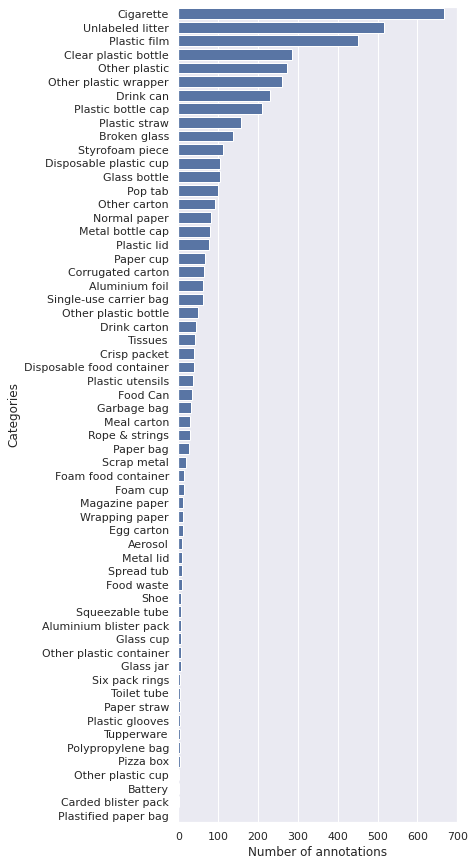

In [ ]:
#Veamos contenido por categoria
# Contabilizamos anotaciones
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Inicializamos matplotlib
f, ax = plt.subplots(figsize=(5,15))

# Convertimos a DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Histograma
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()
# fig.savefig("output.png")

In [ ]:
# veamos las categorias para armar .yaml
print(np.count_nonzero(np.array(df["Categories"])))
np.array(df["Categories"])

60


array(['Cigarette', 'Unlabeled litter', 'Plastic film',
       'Clear plastic bottle', 'Other plastic', 'Other plastic wrapper',
       'Drink can', 'Plastic bottle cap', 'Plastic straw', 'Broken glass',
       'Styrofoam piece', 'Disposable plastic cup', 'Glass bottle',
       'Pop tab', 'Other carton', 'Normal paper', 'Metal bottle cap',
       'Plastic lid', 'Paper cup', 'Corrugated carton', 'Aluminium foil',
       'Single-use carrier bag', 'Other plastic bottle', 'Drink carton',
       'Tissues', 'Crisp packet', 'Disposable food container',
       'Plastic utensils', 'Food Can', 'Garbage bag', 'Meal carton',
       'Rope & strings', 'Paper bag', 'Scrap metal',
       'Foam food container', 'Foam cup', 'Magazine paper',
       'Wrapping paper', 'Egg carton', 'Aerosol', 'Metal lid',
       'Spread tub', 'Food waste', 'Shoe', 'Squeezable tube',
       'Aluminium blister pack', 'Glass cup', 'Other plastic container',
       'Glass jar', 'Six pack rings', 'Toilet tube', 'Paper straw',


#### Cargamos coco

In [ ]:
# Ahora vamos a usar COCO para tratar las etiquetas
data_source = COCO(annotation_file=anns_file_path)
catIds = data_source.getCatIds()
categories = data_source.loadCats(catIds)
categories.sort(key=lambda x: x['id'])

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [ ]:
print(np.array(pd.DataFrame(categories)["name"])) 


['Aluminium foil' 'Battery' 'Aluminium blister pack' 'Carded blister pack'
 'Other plastic bottle' 'Clear plastic bottle' 'Glass bottle'
 'Plastic bottle cap' 'Metal bottle cap' 'Broken glass' 'Food Can'
 'Aerosol' 'Drink can' 'Toilet tube' 'Other carton' 'Egg carton'
 'Drink carton' 'Corrugated carton' 'Meal carton' 'Pizza box' 'Paper cup'
 'Disposable plastic cup' 'Foam cup' 'Glass cup' 'Other plastic cup'
 'Food waste' 'Glass jar' 'Plastic lid' 'Metal lid' 'Other plastic'
 'Magazine paper' 'Tissues' 'Wrapping paper' 'Normal paper' 'Paper bag'
 'Plastified paper bag' 'Plastic film' 'Six pack rings' 'Garbage bag'
 'Other plastic wrapper' 'Single-use carrier bag' 'Polypropylene bag'
 'Crisp packet' 'Spread tub' 'Tupperware' 'Disposable food container'
 'Foam food container' 'Other plastic container' 'Plastic glooves'
 'Plastic utensils' 'Pop tab' 'Rope & strings' 'Scrap metal' 'Shoe'
 'Squeezable tube' 'Plastic straw' 'Paper straw' 'Styrofoam piece'
 'Unlabeled litter' 'Cigarette']


In [ ]:
super = [c['supercategory'] for c in categories]
super = sorted(list(set(super)))
classes = {}
for i, s in enumerate(super):
  classes[s] = i

In [ ]:

# remapping label id to 0~1 5: 0, 12: 1
labels_transfer = {}
for c in categories:
    labels_transfer[c['id']] = classes[c['supercategory']]

In [ ]:
#!mkdir -p labels images
#!ls

In [ ]:
#!mkdir -p temp

In [ ]:
#%mv labels /content/gdrive/MyDrive/VPC2_TP_Final/TACO/ /content/gdrive/MyDrive/VPC2_TP_Final/TACO/temp/

#### Pasamos las etiquetas de dataset de TACO a formato coco, un archivo .txt para cada imagen que contenga una fila con numero de clase y coordenadas de bbox

In [ ]:
IMAGES_PATH = '/content/drive/MyDrive/VPC2_TP_Final/TACO/temp/images/'
LABELS_PATH = '/content/drive/MyDrive/VPC2_TP_Final/TACO/temp/labels/'

In [ ]:
"""#no vamos a ejecutar esto otra vez

img_ids = data_source.getImgIds()

for index, img_id in tqdm.tqdm(enumerate(img_ids)):
    img_info = data_source.loadImgs(img_id)[0]
    
    # img_dir: batch_x/.....jpg ---> batch_x_......jpg
    img_dir = img_info['file_name'].replace('/', '_')
    
    image_name = img_dir.split('.')[0]
    label_dir = LABELS_PATH + image_name + '.txt'
    
    height = img_info['height']
    width = img_info['width']

    # get images
    shutil.copy(f"{dataset_path}/{img_info['file_name']}", os.path.join(IMAGES_PATH, img_dir))

    # get labels
    with open(label_dir, mode='w') as fp:
        annotation_id = data_source.getAnnIds(img_id)
        if len(annotation_id) == 0:
            fp.write('')
            continue
        boxes = np.zeros((0, 5))
        annotations = data_source.loadAnns(annotation_id)
        lines = ''
        for annotation in annotations:
            label = labels_transfer[annotation['category_id']]
            box = annotation['bbox']
            # some annotations have basically no width / height (extremely small), skip them
            if box[2] < 1 or box[3] < 1:
                continue
            # top_x,top_y,width,height ----> cen_x,cen_y,width,height
            # standardize to 0-1
            box[0] = round((box[0] + box[2] / 2) / width, 6)
            box[1] = round((box[1] + box[3] / 2) / height, 6)
            box[2] = round(box[2] / width, 6)
            box[3] = round(box[3] / height, 6)
            # line: label x_center y_center width height
            lines = lines + str(label)
            for i in box:
                lines += ' ' + str(i)
            lines += '\n'
        fp.writelines(lines)

"""

#### Verificamos la coherencia de salida del formato de etiquetas con la numeración y cantidad de 

In [ ]:
print(len(os.listdir(IMAGES_PATH)))
print(len(os.listdir(LABELS_PATH)))

1500
1500


In [ ]:
print(os.listdir(LABELS_PATH)[0],os.listdir(IMAGES_PATH)[0])

batch_14_000000.txt batch_13_000099.jpg


#### Hacemos train/val split por carpeta

In [ ]:
#!pip install split-folders ###ya se hizo
#import splitfolders

In [ ]:
#splitfolders.ratio('/content/gdrive/MyDrive/VPC2_TP_Final/TACO/temp', output='taco_split', seed=1337, ratio=(.8, 0.2)) #si se quiere valid, se agrega un valor mas en ratio
#!ls

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/VPC2_TP_Final/TACO/taco_split/train/images")))
print(len(os.listdir("/content/drive/MyDrive/VPC2_TP_Final/TACO/taco_split/train/labels")))

1200
1200


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/VPC2_TP_Final/TACO/taco_split/val/images")))
print(len(os.listdir("/content/drive/MyDrive/VPC2_TP_Final/TACO/taco_split/val/labels")))

300
300


#### Hasta aca tenemos dos carpetas, train y val, dentro de cada una tenemos images y labels que corresponden
> a partir de los datos de path, cantidad de categorias y etiquetas de categorias hemos generado un taco.yaml, necesario para la linea de comando de yolov5

In [ ]:
#!pip install google-utils

In [ ]:
#!git clone https://github.com/ultralytics/yolov5  # clone
#%cd yolov5
#!pip install -r requirements.txt  # install

In [ ]:
#from utils.google_utils import *
#from google_utils import *
#attempt_download('weights/yolov5s.pt') #pesos preentrenados de yolov5 para imagenes de 640x640
#attempt_download('weights/yolov5m.pt')
#attempt_download('weights/yolov5l.pt')
#attempt_download('weights/yolov5x.pt')

In [ ]:
#Nos posicionamos en la carpeta de modelo yolov5
%cd /content/drive/MyDrive/VPC2_TP_Final/yolov5

/content/drive/MyDrive/VPC2_TP_Final/yolov5


In [ ]:
%ls

CONTRIBUTING.md  hubconf.py    README.md         train.py        wandb/
data/            LICENSE       requirements.txt  tutorial.ipynb  yolov5n6.pt
detect.py        models/       runs/             utils/          yolov5s.pt
export.py        __pycache__/  setup.cfg         val.py          yolov5x6.pt


In [ ]:
#%pip install -qr requirements.txt  # install
import utils
import torch
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [ ]:
# Importamos Weights & Biases  para las metricas interactivas
%pip install -q wandb
import wandb
#wandb.login()

     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 181 kB 69.1 MB/s 
     |████████████████████████████████| 145 kB 69.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


In [ ]:
#corremos esta linea si fallan los pesos
#!python detect.py --weights yolov5s.pt #detectamos los pesos preentrenados, ya que no se han traido de forma automatica

#### Aca tengo todas las opciones que acepta linea de comando para yolov5

wandb: Currently logged in as: oksana. Use `wandb login --relogin` to force relogin
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--local_rank LOCAL_RANK]
                [--entity ENTITY] [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]
train.py: error: unrecognized arguments: --dataset path_train_img --annotation path_train_lab

# **Se entrena el modelo con taco dataset**

# #1.

* Tamaño de imagen cuadrada: img 640
* Cantidad de epochs: 50 
* Archivo de configuración que contiene path train/val y cantidadd y tipo de categorias del dato a utilizar para training: taco.yaml
* Batch-size: 64 
* Hiperparametros: default con data agumentation







In [ ]:
# Train YOLOv5s on taco for 50 epochs from scratch, 
!python train.py --img 640 --epochs 50 --data taco.yaml --batch-size 64 --cache 

wandb: Currently logged in as: oksana. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=taco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias

# #2.
* Transfer Learning, capas frizadas: 10 (backbone de yolov5)
* Tamaño de imagen cuadrada: img 640
* Cantidad de epochs: 50 
* Archivo de configuración que contiene path train/val y cantidadd y tipo de categorias del dato a utilizar para training: taco.yaml
* Batch-size: 64 
* Hiperparametros: default sin data agumentation


In [ ]:
!python train.py --img 640 --epochs 50 --data taco.yaml --weights yolov5s.pt  --hyp hyp_noDA.yaml --batch-size 64 --freeze 10 --cache 

wandb: Currently logged in as: oksana. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=taco.yaml, hyp=hyp_noDA.yaml, epochs=50, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.0

# #3. 
> por recomendación de yolov vamos a agrandar la imagen a 1280 y vamos a utilizar los pesos preentrenados para imagenes de este tamaño con el mejor performance según  https://github.com/ultralytics/yolov5/releases
* Transfer Learning, capas frizadas: 10 (backbone de yolov5)
* Tamaño de imagen cuadrada: img 1280 (pesos yolov5x6.pt, preentrenados en imagenes de 1280)
* Cantidad de epochs: 50 
* Archivo de configuración que contiene path train/val y cantidadd y tipo de categorias del dato a utilizar para training: taco.yaml
* Batch-size: 6 (A mayor batch, se satura ram)
* Hiperparametros: default sin data agumentation 

In [ ]:
# Train YOLOv5s on taco for 50 epochs 
!python train.py --img 1280 --epochs 50 --data taco.yaml --weights yolov5x6.pt  --hyp hyp_noDA.yaml --batch-size 6 --freeze 10 --cache  

wandb: Currently logged in as: oksana. Use `wandb login --relogin` to force relogin
train: weights=yolov5x6.pt, cfg=, data=taco.yaml, hyp=hyp_noDA.yaml, epochs=50, batch_size=6, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.

# #4.
* Transfer Learning, capas frizadas: 10 (backbone de yolov5)
* Tamaño de imagen cuadrada: img 640 (pesos preentrenados en imagenes de 640, yolov5s.pt)
* Cantidad de epochs: 50 
* Archivo de configuración que contiene path train/val y cantidadd y tipo de categorias del dato a utilizar para training: taco.yaml
* Batch-size: 64
* Hiperparametros: default con data agumentation 

In [ ]:
!python train.py --img 640 --epochs 50 --data taco.yaml  --weights yolov5s.pt --batch-size 64 --freeze 10 --cache 

wandb: Currently logged in as: oksana. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=taco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias

# #5. 
> En el informe se muestra un caso adicional: 
* Transfer Learning, capas frizadas: 10 (backbone de yolov5)
* Tamaño de imagen cuadrada: img 1280 (pesos yolov5x6.pt, preentrenados en imagenes de 1280)
* Cantidad de epochs: 50 
* Archivo de configuración que contiene path train/val y cantidadd y tipo de categorias del dato a utilizar para training: taco.yaml
* Batch-size: 6 (A mayor batch, se satura ram)
* Hiperparametros: default **con** data agumentation 